In [4]:
import numpy as np
import pandas as pd
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
smscollection = [line.rstrip() for line in open("C:/Users/yorkuniversity/Documents/cH/smsspamcollection/SMSSpamCollection")]

In [6]:
print("Smscollection is of {type} and its length is equal to {length} \
which is equal to the number of messages or lines in the file.\
".format(type = type(smscollection), length = len(smscollection)))

Smscollection is of <class 'list'> and its length is equal to 5574 which is equal to the number of messages or lines in the file.


In [7]:
# Let's print out some random lines to get a feeling of the structure of data 
# ofc such a file could be reviewd with text editors as well (my favorite = Notepad++) 
# but this verifies whether the file has been read correctly as well

smscollection[239]

"ham\tNew Theory: Argument wins d SITUATION, but loses the PERSON. So dont argue with ur friends just.. . . . kick them &amp; say, I'm always correct.!"

In [8]:
for num, text in enumerate(smscollection[6:14]):
    print(num, text)

0 ham	Even my brother is not like to speak with me. They treat me like aids patent.
1 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
2 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
3 spam	Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
4 ham	I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
5 spam	SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
6 spam	URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW

In [9]:
# Given the tab separated texts that we have in the file with the label put first, we can create a dataframe with pandas:

sms_df = pd.read_csv('C:/Users/yorkuniversity/Documents/cH/smsspamcollection/SMSSpamCollection', sep= '\t', names = ['label', 'text'])

In [10]:
sms_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms_df['text length'] = sms_df['text'].apply(lambda text: len(text.split(' ')))

In [12]:
sms_df.head()

,label,text,text length
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [13]:
sms_df.describe()

,text length
count,5572.000000
mean,15.709440
std,11.493753
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,171.000000


<AxesSubplot:xlabel='text length', ylabel='Count'>

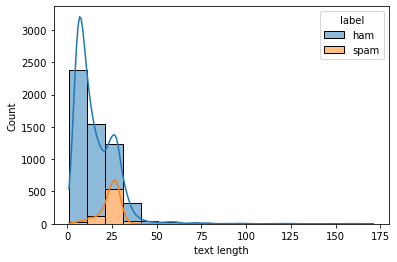

In [14]:
sns.histplot(data=sms_df, x = "text length", kde=True, binwidth = 10, hue = 'label', multiple = 'stack') 

<AxesSubplot:xlabel='label', ylabel='count'>

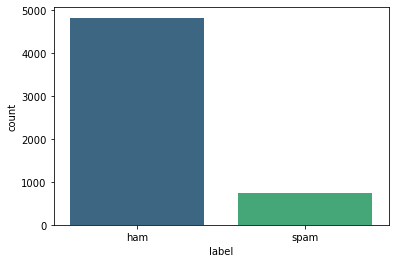

In [15]:
#Looking at the histogram of the data that is hued by the type of the message (being spam or not), one could see that spam messages tend to be longer than legitimate messages. Also the counts of the two classes seem inbalanced which could be further verified:

sns.countplot(x='label', data = sms_df, palette = 'viridis')


In [16]:
# the countplot also suggests that there is an imbalance between the distributions of classes in the data
# Now it is time for Data preprocessing

import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yorkuniversity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
def preprocess_text(text):
    """
    
    1. make text lower case
    2. remove links
    3. remove punc
    4. remove words with numbers
    5. remove stop words
    6. stemming
    
    """
    text_lower = str(text).lower()
    text_nolink = re.sub('https?://\S+|www\.\S+', '', text_lower)
    punc_free_chars = [ch for ch in text if ch not in string.punctuation]
    text_no_punctuation = ''.join(punc_free_chars)
    nonumb_words = re.sub('\w*\d\w*', '', text_no_punctuation)
    clean_words = [w for w in nonumb_words.split() if w not in stopwords.words('english')]
    stemmed_words = [nltk.SnowballStemmer('english').stem(w) for w in clean_words]
    return stemmed_words

def join_words(list):
    text=' '.join(list)
    return text

In [18]:
sms_df['clean_words'] = sms_df['text'].apply(preprocess_text)
sms_df['clean_text'] = sms_df['clean_words'].apply(join_words)
sms_df.head()

,label,text,text length,clean_words,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,11,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"[nah, i, dont, think, goe, usf, live, around, ...",nah i dont think goe usf live around though


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

transformer = CountVectorizer(analyzer = preprocess_text).fit(sms_df['text'])

In [20]:
print('The number of unique words in the entire corpus is {count}'.format(count = len(transformer.vocabulary_)))

The number of unique words in the entire corpus is 6981


In [21]:
bow_sms = transformer.transform(sms_df['text'])

In [22]:
print('The Sparse Matrix for the transformed bag of words for the entire corpus has a shape of {shape}'.format(shape = bow_sms.shape))

The Sparse Matrix for the transformed bag of words for the entire corpus has a shape of (5572, 6981)


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow_sms)
tfidf_sms = tfidf_transformer.transform(bow_sms)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix

folds = StratifiedKFold(n_splits=5)

nb_spam_pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

rf_spam_pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

svm_spam_pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC(gamma='auto'))
])


nb_scores = []
rf_scores = []
svm_scores = []

i=1
for sms_train_index, sms_test_index in folds.split(sms_df['text'],sms_df['label']):
    sms_train, sms_test, label_train, label_test = sms_df['text'][sms_train_index], sms_df['text'][sms_test_index], \
                                       sms_df['label'][sms_train_index], sms_df['label'][sms_test_index]  
    
    nb_spam_pipeline.fit(sms_train, label_train)
    nb_predictions = nb_spam_pipeline.predict(sms_test)
    
    print('the Naive Bayes classification report for fold #{number} is:'.format(number = i))
    print(classification_report(label_test,nb_predictions))
    
    rf_spam_pipeline.fit(sms_train, label_train)
    rf_predictions = rf_spam_pipeline.predict(sms_test)
    
    print('the Random Forest classification report for fold #{number} is:'.format(number = i))
    print(classification_report(label_test,rf_predictions))
    
    svm_spam_pipeline.fit(sms_train, label_train)
    svm_predictions = rf_spam_pipeline.predict(sms_test)
    
    print('the SVM classification report for fold #{number} is:'.format(number = i))
    print(classification_report(label_test,svm_predictions))
    
    nb_scores.append(nb_spam_pipeline.score(sms_test, label_test))
    rf_scores.append(rf_spam_pipeline.score(sms_test, label_test))
    svm_scores.append(svm_spam_pipeline.score(sms_test, label_test))
    
    i = i+1
    


the Naive Bayes classification report for fold #1 is:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

the Random Forest classification report for fold #1 is:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

the SVM classification report for fold #1 is:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy              

In [25]:
print('The Naive Bayes Spam Detector accuracy results for 5-fold cross validation is:')
print(nb_scores)
print('The Random Forest Spam Detector accuracy results for 5-fold cross validation is:')
print(rf_scores)
print('The SVM Spam Detector accuracy results for 5-fold cross validation is:')
print(svm_scores)


def predict_spam_ham_nb(text):
    print(nb_spam_pipeline.predict([text]))
    
def predict_spam_ham_rf(text):
    print(rf_spam_pipeline.predict([text]))
    
def predict_spam_ham_svm(text):
    print(svm_spam_pipeline.predict([text]))

The Naive Bayes Spam Detector accuracy results for 5-fold cross validation is:
[0.968609865470852, 0.9632286995515695, 0.9596050269299821, 0.9605026929982047, 0.9649910233393177]
The Random Forest Spam Detector accuracy results for 5-fold cross validation is:
[0.97847533632287, 0.9713004484304932, 0.9748653500897666, 0.9685816876122083, 0.9748653500897666]
The SVM Spam Detector accuracy results for 5-fold cross validation is:
[0.8654708520179372, 0.8654708520179372, 0.8662477558348295, 0.8662477558348295, 0.8662477558348295]


In [26]:
predict_spam_ham_nb('Hi Anita I will be late for the party tonight. Please let guests know about the situation')

['ham']


In [27]:
predict_spam_ham_rf('Hi Anita I will be late for the party tonight. Please let guests know about the situation')

['ham']


In [28]:
predict_spam_ham_svm('Hi Anita I will be late for the party tonight. Please let guests know about the situation')

['ham']


In [29]:
predict_spam_ham_rf('SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info')

['spam']


In [30]:
predict_spam_ham_nb('SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info')

['spam']


In [52]:
predict_spam_ham_svm('SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info')

['ham']


In [94]:
from sklearn.preprocessing import LabelEncoder

la_en = LabelEncoder()
la_en.fit(sms_df['label'])
sms_df['label_encoded'] = la_en.transform(sms_df['label'])
sms_df.head()

,label,text,text length,clean_words,clean_text,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,6,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkts may...,1
3,ham,U dun say so early hor... U c already then say...,11,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"[nah, i, dont, think, goe, usf, live, around, ...",nah i dont think goe usf live around though,0


In [95]:
import transformers
from transformers import BertTokenizer
from tokenizers import BertWordPieceTokenizer
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import TFBertModel

berttokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def encodewithbert(sms, max_len) :
    input_ids = []
    attention_masks = []

    for text in sms:
        encoded = berttokenizer.encode_plus(text, add_special_tokens=True,
                                            max_length= max_len,
                                            padding = 'max_length',
                                            truncation = True,
                                            return_attention_mask=True)
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)



bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [96]:
encodewithbert(sms_df['clean_text'], 70)

(array([[  101,  2175, 18414, ...,     0,     0,     0],
        [  101,  7929,  2474, ...,     0,     0,     0],
        [  101,  2489,  4372, ...,     0,     0,     0],
        ...,
        [  101,  6770,  2072, ...,     0,     0,     0],
        [  101,  1996,  3124, ...,     0,     0,     0],
        [  101, 20996, 10258, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]))

In [97]:
train_inputids, train_attmasks = encodewithbert(sms_df['clean_text'], 70)

In [98]:
def create_model(bertmodel):
    
    input_ids = tf.keras.Input(shape=(70,), dtype='int32')
    att_masks = tf.keras.Input(shape=(70,), dtype='int32')

    output = bert_model([input_ids,att_masks])
    output = output[1]
    output = layers.Dense(32,activation='relu')(output)
    output = layers.Dropout(0.1)(output)
    output = layers.Dense(16,activation='relu')(output)
    output = layers.Dropout(0.1)(output)
    output = layers.Dense(1,activation='sigmoid')(output)
    
    model = models.Model(inputs = [input_ids,att_masks], outputs = output)
    model.compile(optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [99]:
model = create_model(bert_model)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 70)]         0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model_5 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_11[0][0]',               
                                thPoolingAndCrossAt               'input_12[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                          

In [100]:
history = model.fit(
    [train_inputids, train_attmasks],
    sms_df['label_encoded'],
    validation_split=0.2, 
    epochs=4,
    batch_size=10
)

Epoch 1/4
446/446 [==============================] - 2972s 7s/step - loss: 0.2148 - accuracy: 0.9156 - val_loss: 0.0620 - val_accuracy: 0.9803
Epoch 2/4
446/446 [==============================] - 2651s 6s/step - loss: 0.0667 - accuracy: 0.9838 - val_loss: 0.1168 - val_accuracy: 0.9570
Epoch 3/4
446/446 [==============================] - 2417s 5s/step - loss: 0.0369 - accuracy: 0.9926 - val_loss: 0.0507 - val_accuracy: 0.9883
Epoch 4/4
446/446 [==============================] - 2427s 5s/step - loss: 0.0340 - accuracy: 0.9917 - val_loss: 0.0452 - val_accuracy: 0.9865


C:\Users\yorkuniversity\anaconda3\envs\nlppy37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

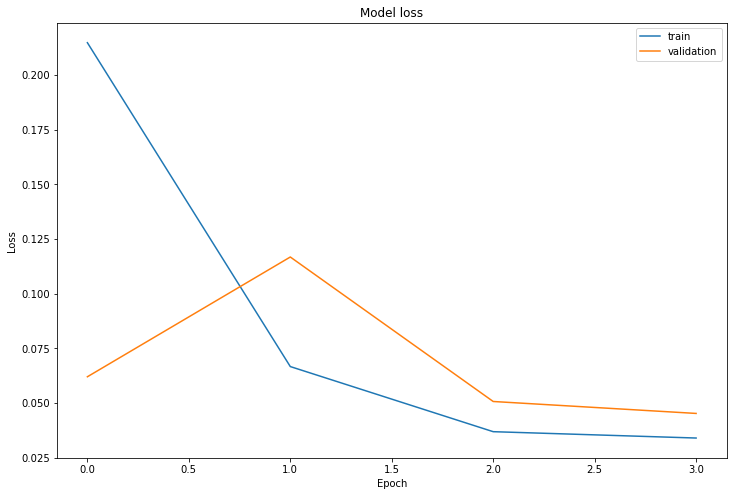

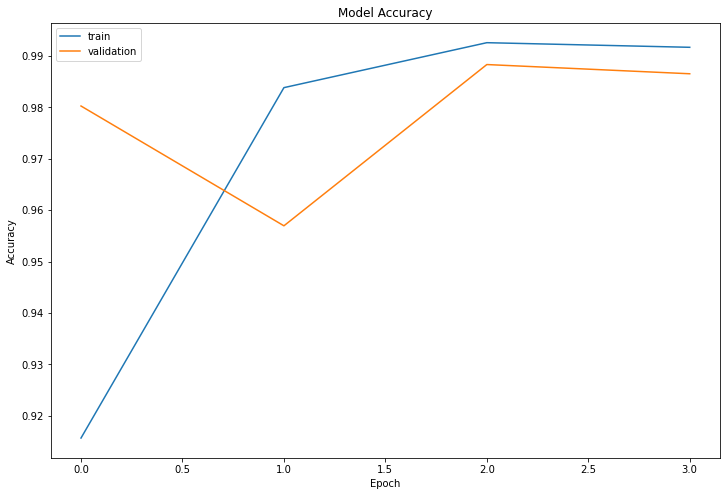

In [101]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [105]:
import xgboost as xgb

In [107]:
xgb_spam_pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer= preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', xgb.XGBClassifier(
        learning_rate = 0.1,
        max_depth = 7,
        n_estimators = 75,
        use_label_encoder = False,
        eval_metric = 'auc'
    ))
])

In [110]:
i=1
xgb_scores = []
for sms_train_index, sms_test_index in folds.split(sms_df['text'],sms_df['label_encoded']):
    sms_train, sms_test, label_train, label_test = sms_df['text'][sms_train_index], sms_df['text'][sms_test_index], \
                                       sms_df['label_encoded'][sms_train_index], sms_df['label_encoded'][sms_test_index]  
    
    xgb_spam_pipeline.fit(sms_train, label_train)
    xgb_predictions = xgb_spam_pipeline.predict(sms_test)
    
    print('the XGBoost classification report for fold #{number} is:'.format(number = i))
    print(classification_report(label_test,xgb_predictions))
    

    xgb_scores.append(xgb_spam_pipeline.score(sms_test, label_test))
    
    i = i+1

the XGBoost classification report for fold #1 is:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.95      0.84      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

the XGBoost classification report for fold #2 is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.95      0.79      0.87       150

    accuracy                           0.97      1115
   macro avg       0.96      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115

the XGBoost classification report for fold #3 is:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.84      0.90       149

    accuracy                    

In [111]:
print('The XGBoost Spam Detector accuracy results for 5-fold cross validation is:')
print(xgb_scores)

The XGBoost Spam Detector accuracy results for 5-fold cross validation is:
[0.9721973094170404, 0.9668161434977578, 0.9748653500897666, 0.9649910233393177, 0.9766606822262118]
